Se ocuparan los datos obtenidos de Github donde se suben los datos covid por dia desde el primer contagiado en chile

Importamos la librerias a ocupar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files #para mas adelante poder descargar los graficos
import datetime as dt

import seaborn as sns

#aqui se cambia el estilo a los graficos
plt.style.use('fivethirtyeight')

Obtenemos la fecha a consultar

In [ ]:
DIC_mes = {
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre',
}

In [ ]:
print('Las fechas las cuales se pueden consultar son del 2020-03-03 hasta un dia anterior a la consulta')
date = input('Ingrese la fecha a consultar en el siguiente formato yyyy-mm-dd: ')

Las fechas las cuales se pueden consultar son del 2020-03-03 hasta un dia anterior a la consulta
Ingrese la fecha a consultar en el siguiente formato yyyy-mm-dd: 2022-04-06


In [ ]:
date

'2022-04-06'

Buscamos en la base de datos para cargar el archivo cvs, importarlo a panda

In [ ]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/"+date+"-CasosConfirmados-totalRegional.csv", index_col='Region')

esta lista nos arudara a filtrar mas adelante

In [ ]:
columnas = list(dataTotalRegion.columns.values)
columnas

['Casos totales acumulados',
 'Fallecidos confirmados totales',
 'Fallecidos sospechosos probables u otros totales',
 'Fallecidos totales',
 'Casos confirmados recuperados',
 'Casos confirmados por antigeno',
 'Casos con sospecha de reinfeccion',
 'Casos probables acumulados',
 'Casos activos probables',
 'Casos nuevos totales',
 'Casos nuevos con sintomas',
 'Casos nuevos sin sintomas*',
 'Casos nuevos reportados por laboratorio',
 'Casos nuevos confirmados por antigeno',
 'Casos activos confirmados']

despleglamos la informacion recien cargada (solo las 5 columans)

In [ ]:
dataTotalRegion[columnas[0:2]].head()

,Casos totales acumulados,Fallecidos confirmados totales
Region,,
Arica y Parinacota,55361,669
Tarapacá,79514,968
Antofagasta,122729,1471
Atacama,65880,469
Coquimbo,126412,1376


a continuacion cargaremos la informacion de los nuevos confirmados, total confirmados y fellecidos.

In [ ]:
data = pd.DataFrame()
data['nuevosConfirmados'] = dataTotalRegion[columnas[0]]
data['totalConfirmados'] = dataTotalRegion[columnas[1]]
data['Fallecidos'] = dataTotalRegion[columnas[2]]
data.head()

,nuevosConfirmados,totalConfirmados,Fallecidos
Region,,,
Arica y Parinacota,55361,669,140
Tarapacá,79514,968,118
Antofagasta,122729,1471,285
Atacama,65880,469,113
Coquimbo,126412,1376,289


A continuacion se graficaran los total confirmados del doy seleccionado

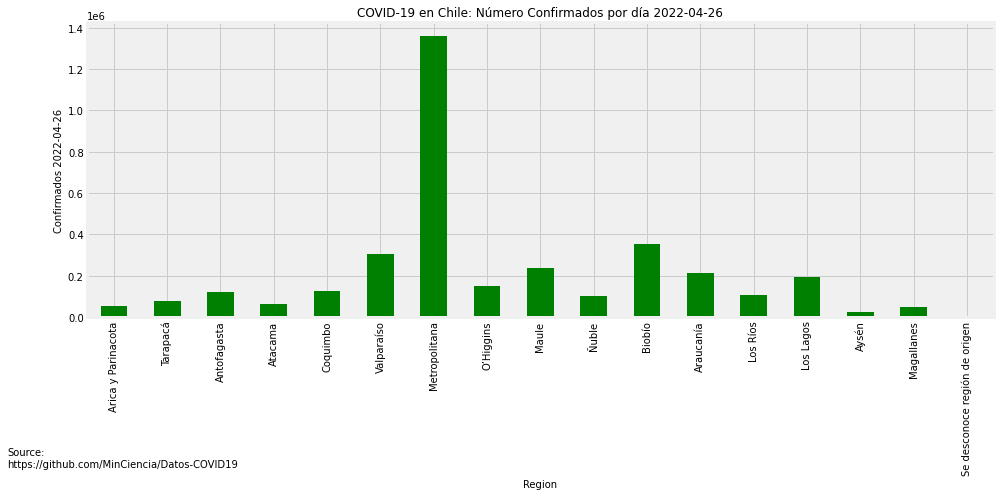

In [ ]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='green')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

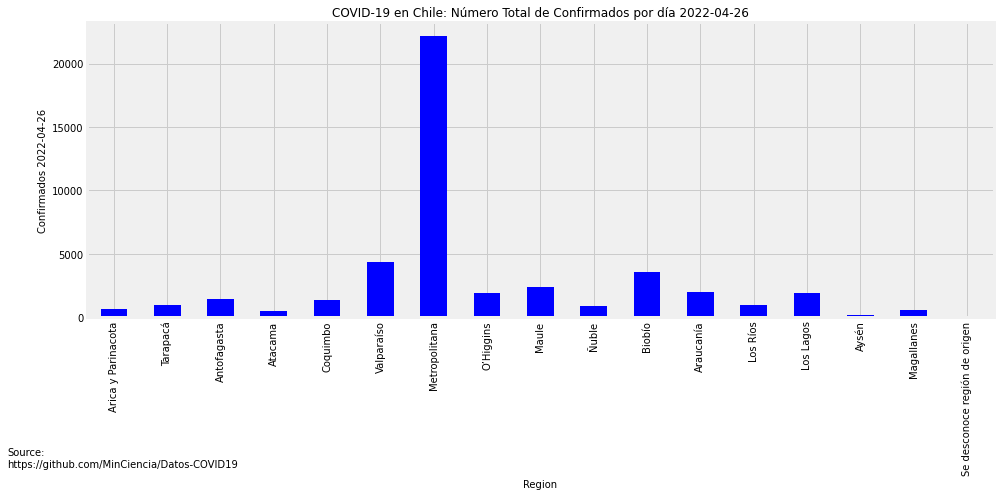

In [ ]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['totalConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='blue')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Total de Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Total-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

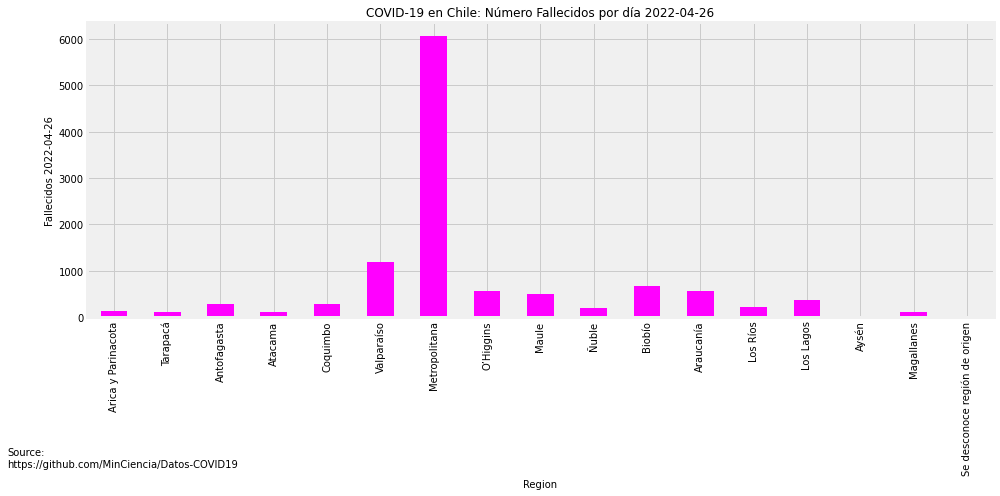

In [ ]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['Fallecidos'].iloc[:-1].plot(ax=ax, kind="bar", color='magenta')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Fallecidos por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Fallecidos '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Fallecidos-Region.png', bbox_inches='tight', format='png', dvi=700)

Ahora se trabajara con los datos totales acomulados por region por lo cual se utilizara el mismo repositorio para la elaboracion de los graficos

In [ ]:
#casosTotalesAcomulados_T = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv"
casosTotalesAcomulados = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
dataTotalRegions = pd.read_csv(casosTotalesAcomulados)
#dataTotalRegions_T = pd.read_csv(casosTotalesAcomulados_T)
dataTotalRegions.head()

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7


procesamiento de datos para obtener totales para posterior graficar

In [ ]:
today = date
first_date = '2020-03-03' #primer contagiado
first_recovered = '2020-03-17' #primer recuperado

# contamos los días considerados con la siguiente instrucción
total_days = (pd.to_datetime(date)-pd.to_datetime(first_date)).days
total_days

764

In [ ]:
columnas1 = list(dataTotalRegions.columns.values)
columnas1

['Region',
 'Arica y Parinacota',
 'Tarapacá',
 'Antofagasta',
 'Atacama',
 'Coquimbo',
 'Valparaíso',
 'Metropolitana',
 'O’Higgins',
 'Maule',
 'Ñuble',
 'Biobío',
 'Araucanía',
 'Los Ríos',
 'Los Lagos',
 'Aysén',
 'Magallanes',
 'Total']

In [ ]:
datos1 = pd.DataFrame()

datos1 = dataTotalRegions
datos1['ANNO'] = dataTotalRegions[columnas1[0]].map(lambda x:x.split('-')[0])
datos1['MES'] = dataTotalRegions[columnas1[0]].map(lambda x:x.split('-')[1]).map(DIC_mes)
datos1['DIA'] = dataTotalRegions[columnas1[0]].map(lambda x:x.split('-')[2]) #no es necesario agregar el dia

datos1 = datos1.groupby(['ANNO', 'MES'], sort=False).sum()

datos1.head()

Arica y Parinacota  Tarapacá  Antofagasta  Atacama  Coquimbo  \
ANNO MES                                                                   
2020 Marzo                  36        48          245       21       157   
     Abril                4056      2362         6702      466      1870   
     Mayo                12804     31359        45209     4394      7471   
     Junio               34842    131015       154535    16555     53692   
     Julio               90358    230241       381225    55039    140870   

            Valparaíso  Metropolitana  O’Higgins   Maule  Ñuble  Biobío  \
ANNO MES                                                                  
2020 Marzo         584          10294        166     503   1667    1337   
     Abril        9780         141607       1759    6577  18226   16164   
     Mayo        48112        1140689      11730   20737  29601   35783   
     Junio      224618        4659632      84711  100068  55875  119652   
     Julio      465959        7475619     271510  230931  94161  279752   

            Araucanía  Los Ríos  Los Lagos  Aysén  Magallanes    Total  
ANNO MES                                                                
2020 Marzo       1422       236        808     24         250    17798  
     Abril      26098      4221      11366    202       13308   264764  
     Mayo       50127      7544      20268    283       28858  1494969  
     Junio      81323     15794      36813    775       36767  5806668  
     Julio     113691     24876      81480   1897       49055  9987699

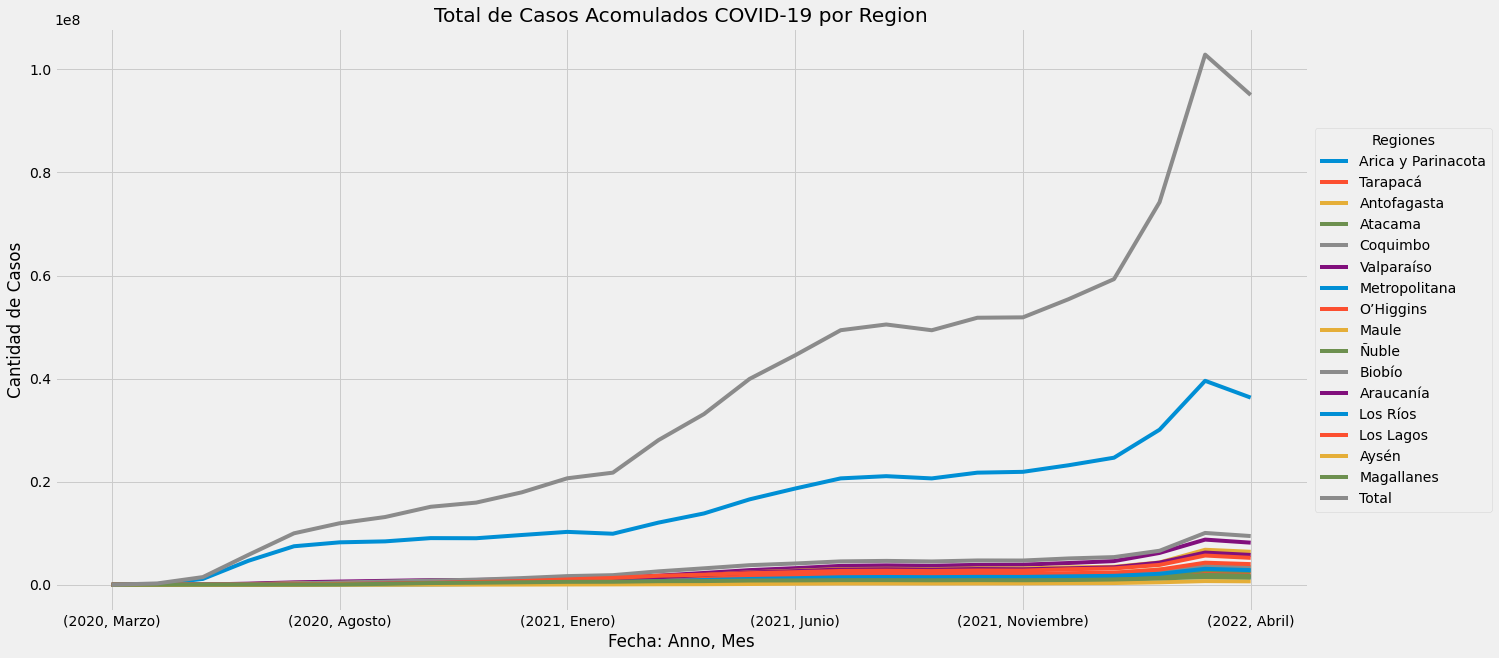

In [ ]:
titulo = 'Total de Casos Acomulados COVID-19 por Region'
grafico = datos1.plot(kind='line', figsize=(20,10), xlabel='Fecha: Anno, Mes', ylabel='Cantidad de Casos', title=titulo)
grafico.legend(title='Regiones', loc='center left', bbox_to_anchor=(1, 0.5))
grafico

grafico por region

In [ ]:
prueb = datos1[columnas1[0+1]] #columna primera posicion
#list(prueb) #datos de la primera posicion
#prueb.index #imprime index

prueb = prueb.reset_index()

prueb

Documentacion maptree https://plotly.com/python/treemaps/

In [ ]:
import plotly.express as px

for x in range (1,18):
  df = datos1[columnas1[x]]
  df = df.reset_index()
  if x == 17:
    grafic = px.treemap(df, title='Total de casos a Nivel Nacional', path=['ANNO', 'MES'], values=columnas1[x])
  else:
    grafic = px.treemap(df, title='Total de casos Region: '+columnas1[x], path=['ANNO', 'MES'], values=columnas1[x])
  #grafic.update_traces(root_color="lightgrey")
  grafic.update_layout(margin = dict(t=50, l=25, r=25, b=25))
  print('\n')
  grafic.show()


calculo de datos del pais total

In [ ]:
casosTotalesPais = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv"
casosTotalesNacionales = pd.read_csv(casosTotalesPais)
casosTotalesNacionales.head()

,Fecha,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,...,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno,Fallecidos confirmados totales,Fallecidos sospechosos probables u otros totales
0,2020-03-02,1.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,2.0,3.0,0.0,0.0,3.0,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,1.0,4.0,0.0,0.0,4.0,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,1.0,5.0,0.0,0.0,5.0,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columasn2 = list(casosTotalesNacionales.columns.values)
columasn2

In [ ]:
datos2 = pd.DataFrame()

datos2 = casosTotalesNacionales
datos2['ANNO'] = casosTotalesNacionales.Fecha.map(lambda x:x.split('-')[0])
datos2['MES'] = casosTotalesNacionales.Fecha.map(lambda x:x.split('-')[1]).map(DIC_mes)
#datos2['DIA'] = casosTotalesNacionales.Fecha.map(lambda x:x.split('-')[2]) no es necesario agregar el dia

datos2 = datos2[['ANNO', 'MES', 'Casos totales', 'Casos activos', 'Casos confirmados recuperados', 'Fallecidos confirmados totales']].groupby(['ANNO', 'MES'], sort=False).sum()
datos2.head()

Casos totales  Casos activos  Casos confirmados recuperados  \
ANNO MES                                                                  
2020 Marzo        17799.0        17104.0                            0.0   
     Abril       264764.0       153991.0                            0.0   
     Mayo       1494969.0       836665.0                            0.0   
     Junio      5806668.0       408823.0                      2211897.0   
     Julio      9987699.0       697150.0                      9050324.0   

            Fallecidos confirmados totales  
ANNO MES                                    
2020 Marzo                             0.0  
     Abril                             0.0  
     Mayo                              0.0  
     Junio                             0.0  
     Julio                             0.0

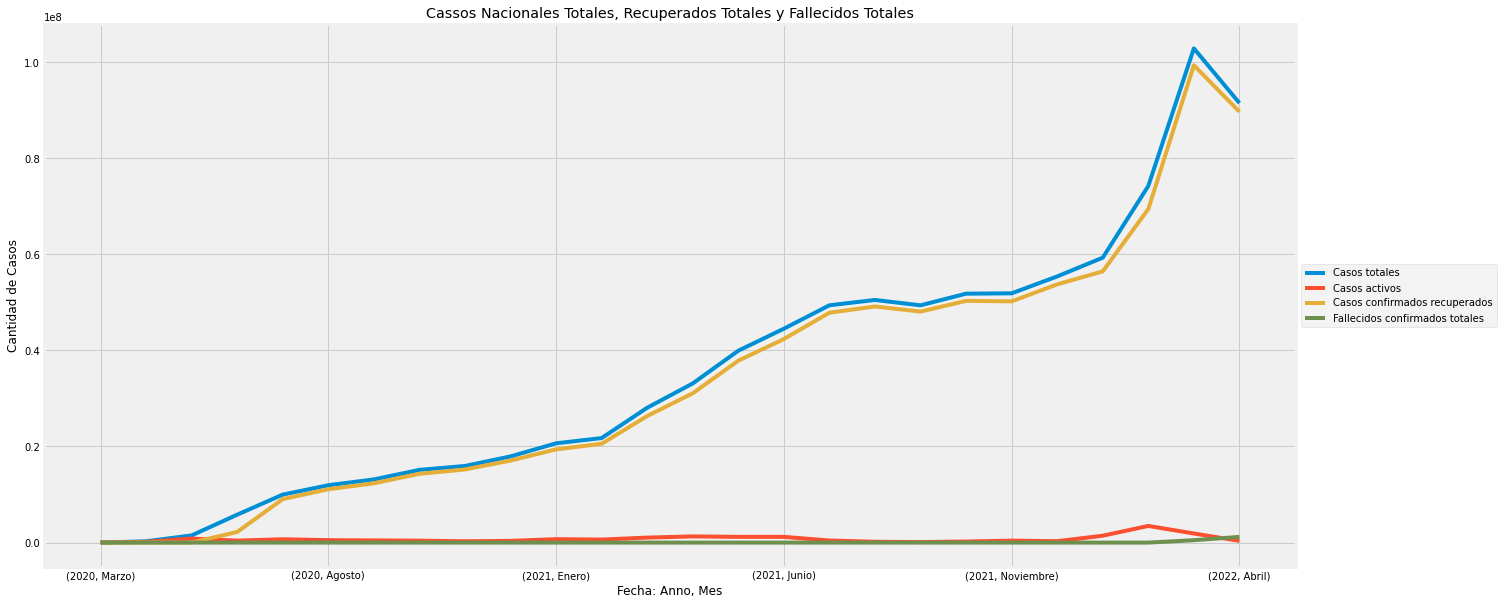

In [ ]:
titulo = 'Cassos Nacionales Totales, Recuperados Totales y Fallecidos Totales'
grafico = datos2.plot(kind='line', figsize=(20,10), xlabel='Fecha: Anno, Mes', ylabel='Cantidad de Casos', title=titulo)
grafico.legend(loc='center left', bbox_to_anchor=(1, 0.5))
grafico

Targetas

In [ ]:
casosTotalesDelPais = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv")
casosTotalesDelPais_T = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv")
casosTotalesAcomulados_region = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv")
casosTotalesAcomulados_region_T = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv")
dataTotalRegiondia = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/"+date+"-CasosConfirmados-totalRegional.csv")


In [ ]:
dataTotalRegiondia.columns.values

array(['Region', 'Casos totales acumulados',
       'Fallecidos confirmados totales',
       'Fallecidos sospechosos probables u otros totales',
       'Fallecidos totales', 'Casos confirmados recuperados',
       'Casos confirmados por antigeno',
       'Casos con sospecha de reinfeccion', 'Casos probables acumulados',
       'Casos activos probables', 'Casos nuevos totales',
       'Casos nuevos con sintomas', 'Casos nuevos sin sintomas*',
       'Casos nuevos reportados por laboratorio',
       'Casos nuevos confirmados por antigeno',
       'Casos activos confirmados'], dtype=object)

In [ ]:
import sqlite3 as db

#Creo la Bd y establezco la conexion
database = "proyecto_final.db"
#db es la libreria sqlite3
conn = db.connect(database)

casosTotalesDelPais.to_sql(name='casosTotalesDelPais', con=conn,if_exists='replace')
casosTotalesDelPais_T.to_sql(name='casosTotalesDelPaisT', con=conn,if_exists='replace')
casosTotalesAcomulados_region.to_sql(name='casosTotalesAcomuladosRegion', con=conn,if_exists='replace')
casosTotalesAcomulados_region_T.to_sql(name='casosTotalesAcomuladosRegionT', con=conn,if_exists='replace')

conn.commit()
conn.close()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,
